In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Exploration
# Load the dataset
df = pd.read_csv('/content/jobs_in_data.csv')

# Examine the structure of the dataset
print(df.info())

# Get basic statistical summary
print(df.describe())

# Step 2: Data Cleaning
# Handle missing values
df.dropna(inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.51947

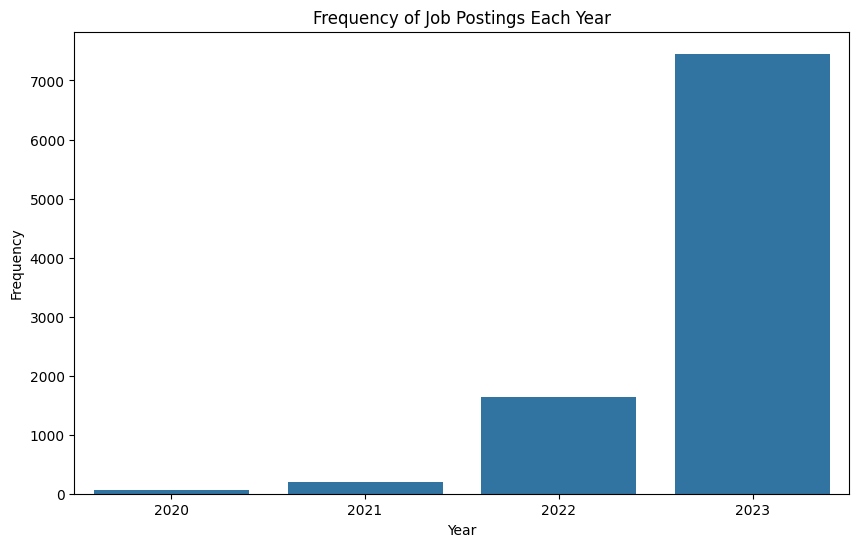

In [18]:
# 1. Get Frequency of Each Year
def add_frequency_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='work_year', data=df)
plt.title('Frequency of Job Postings Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

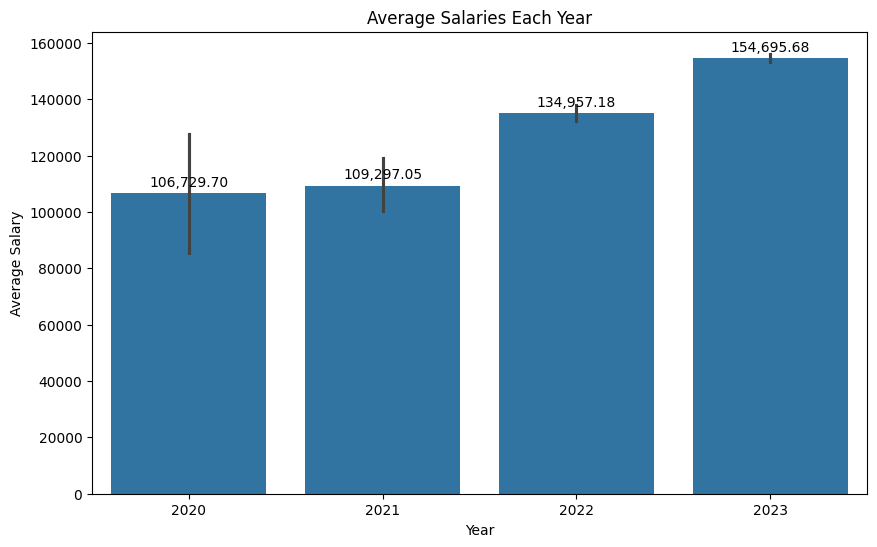

In [20]:
# 2. Get Average Salaries for Each Year

def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

# Visualize Average Salaries Each Year
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='work_year', y='salary', data=df, estimator='mean')
plt.title('Average Salaries Each Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
add_salary_values(ax)
plt.show()

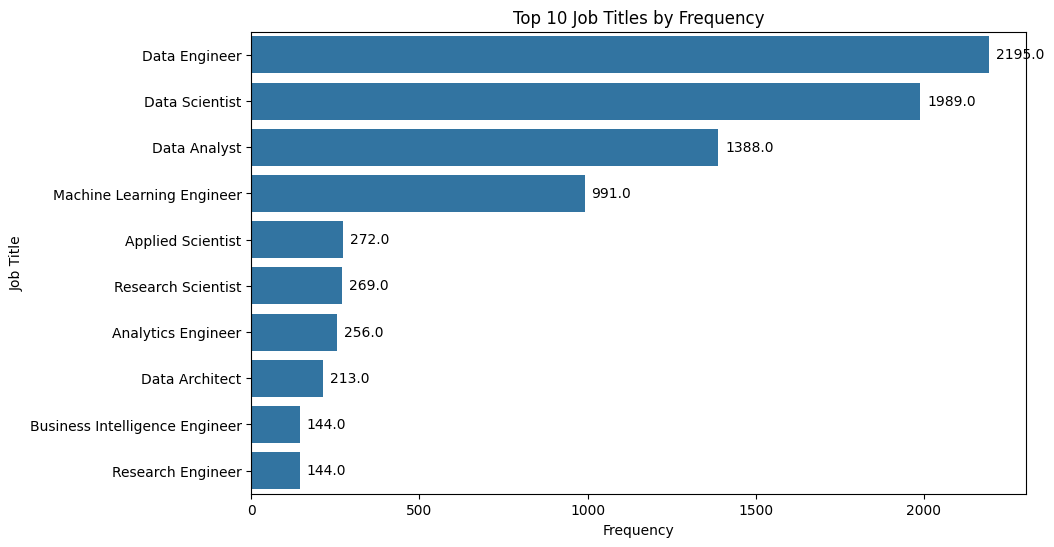

In [16]:
# 3. Get Frequency of Job Titles
def add_frequency_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Get Frequency of Job Titles (Top 10) - Horizontal Bar Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='job_title', data=df, order=df['job_title'].value_counts().index[:10])
plt.title('Top 10 Job Titles by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
add_frequency_values(ax)
plt.show()

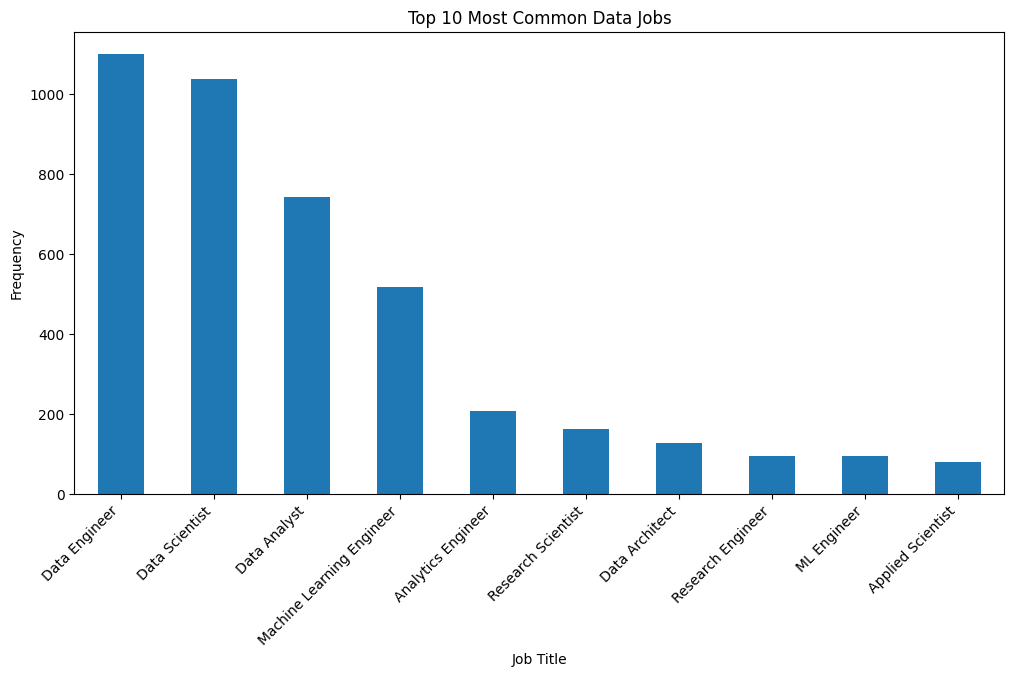

In [9]:
# 4. Get the Top 10 Most Common Data Jobs
top_10_jobs = df['job_title'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_10_jobs.plot(kind='bar')
plt.title('Top 10 Most Common Data Jobs')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-15-4087c8366720>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='salary', y='job_title', data=df_sorted, ci=None, orient='h')


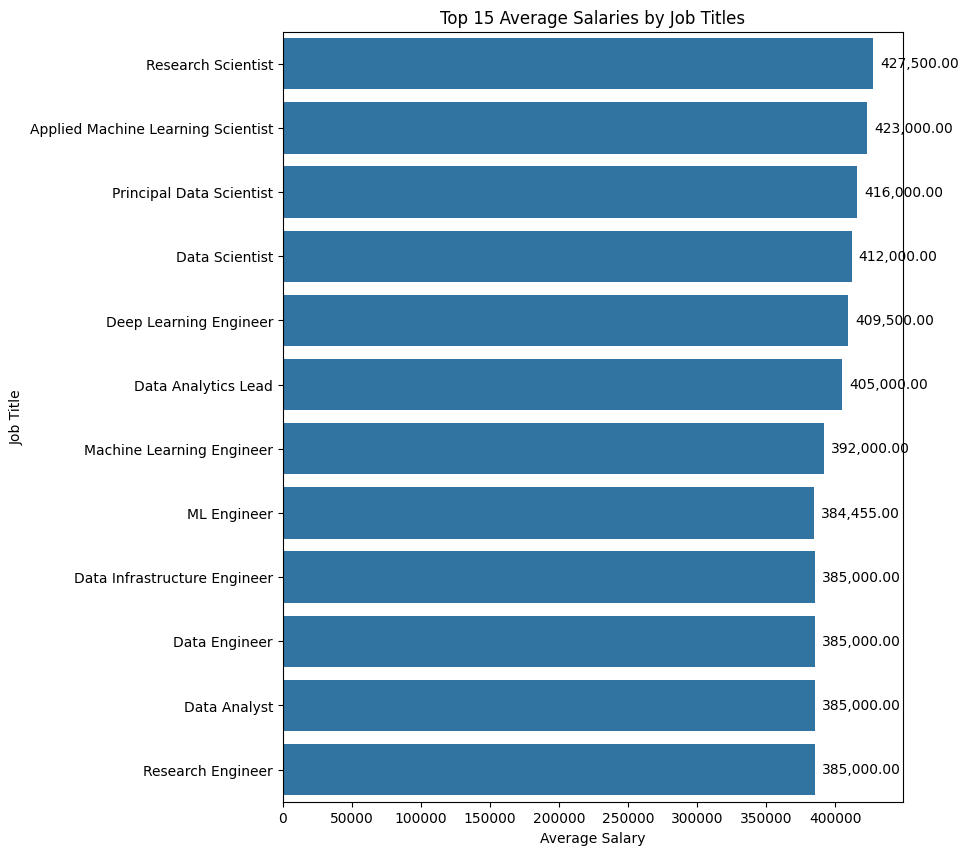

In [15]:
# 5. Visualize Average Salaries by Job Titles
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('//content/jobs_in_data.csv')
# Function to add salary values beside each bar
def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Sort DataFrame by salary and select top 15
df_sorted = df.sort_values(by='salary', ascending=False).head(15)

# Visualize Average Salaries by Job Titles (Top 15)
plt.figure(figsize=(8, 10))
ax = sns.barplot(x='salary', y='job_title', data=df_sorted, ci=None, orient='h')
plt.title('Top 15 Average Salaries by Job Titles')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
add_salary_values(ax)
plt.show()


<ipython-input-42-8df735257d7e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='job_title', y='salary', data=df, ci=None, order=df.groupby('job_title')['salary'].mean().sort_values().index[:15])


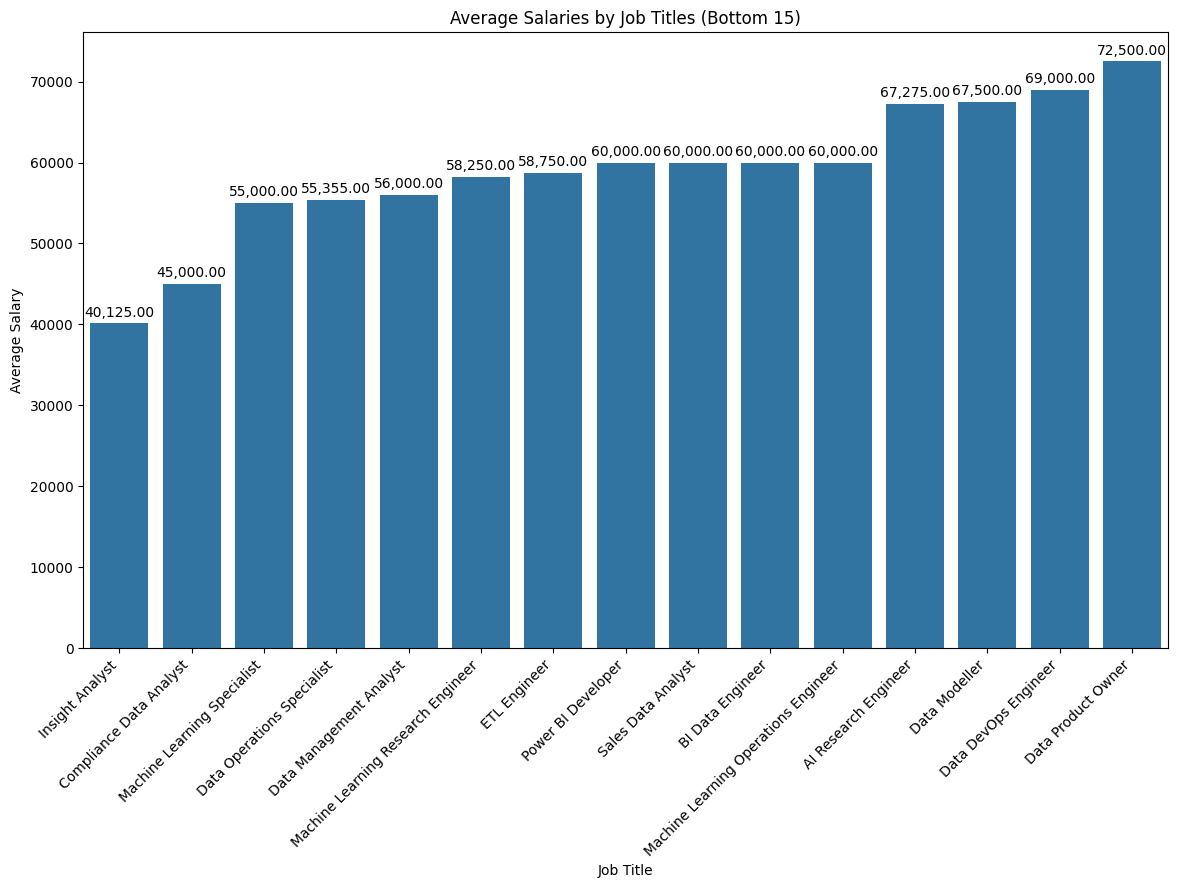

In [42]:
# 6.Visualize Average Salaries by Job Titles (Bottom 15)
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='job_title', y='salary', data=df, ci=None, order=df.groupby('job_title')['salary'].mean().sort_values().index[:15])
plt.title('Average Salaries by Job Titles (Bottom 15)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')

# Function to add values above each bar
def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

add_salary_values(ax)
plt.show()


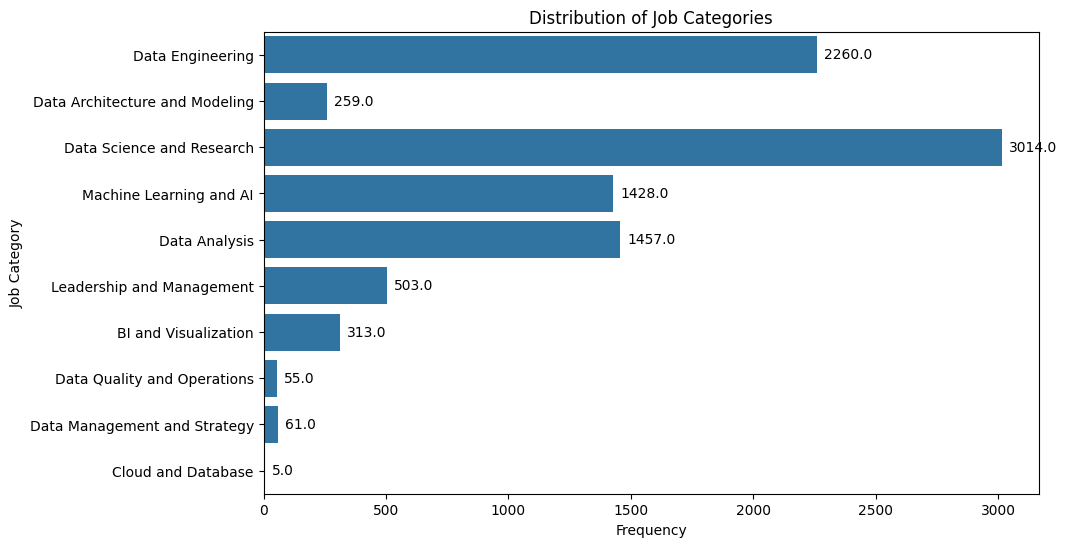

In [24]:
#7 Visualize Distribution of Job Categories

def add_frequency_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Visualize Distribution of Job Categories (Horizontal Count Plot)
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='job_category', data=df)
plt.title('Distribution of Job Categories')
plt.xlabel('Frequency')
plt.ylabel('Job Category')
add_frequency_values(ax)
plt.show()


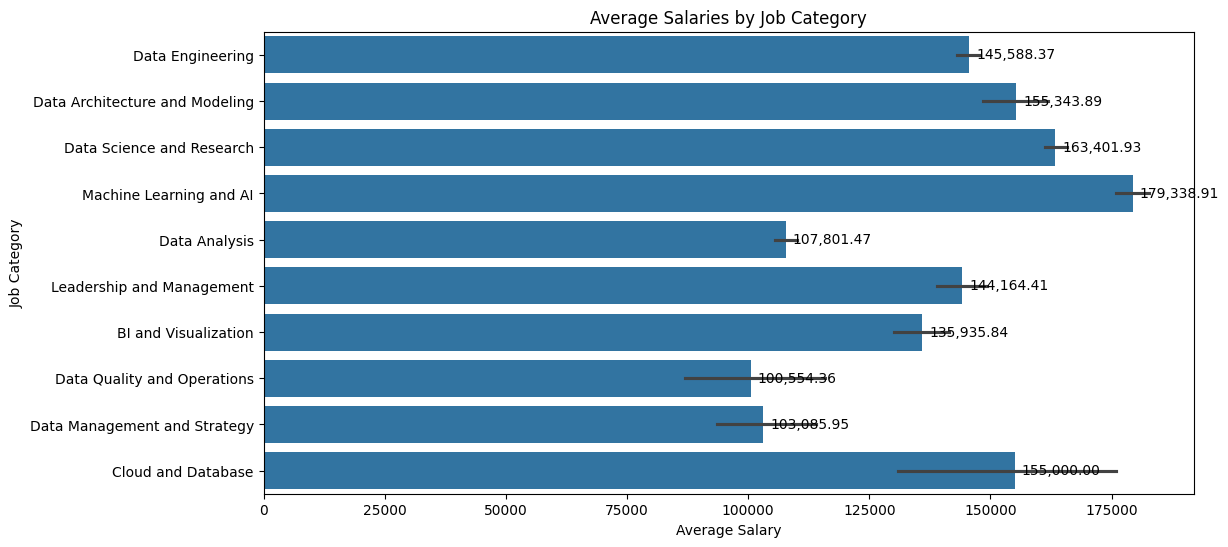

In [25]:
#8 Visualize Average Salaries by Job Category (Horizontal Bar Plot)

def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='salary', y='job_category', data=df)
plt.title('Average Salaries by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Category')
add_salary_values(ax)
plt.show()


<ipython-input-26-586100d4ea4a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='salary_in_usd', y='salary_currency', data=df, ci=None)


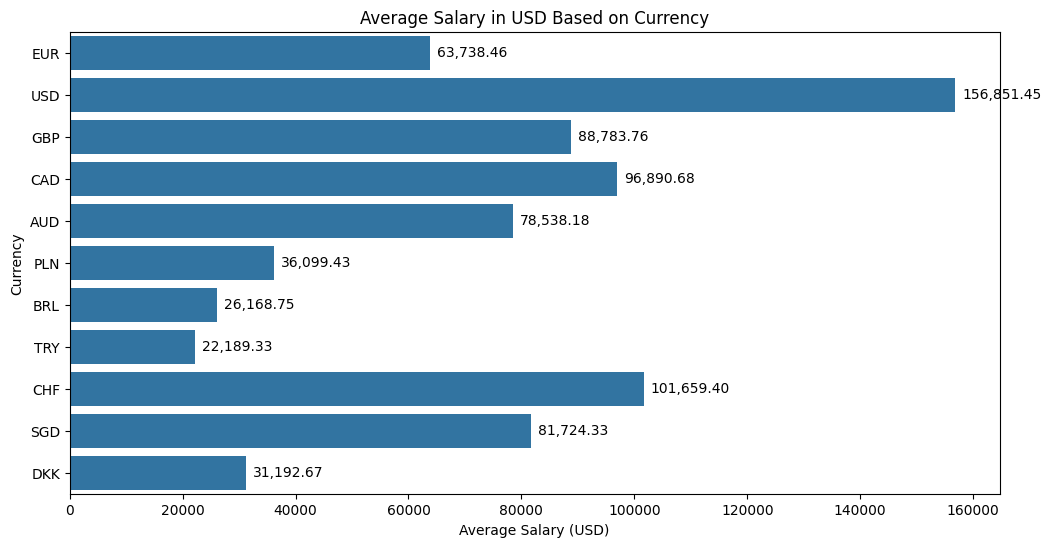

In [26]:
#9 Visualize Average Salary in USD Based on Currency (Horizontal Bar Plot)
def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='salary_in_usd', y='salary_currency', data=df, ci=None)
plt.title('Average Salary in USD Based on Currency')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Currency')
add_salary_values(ax)
plt.show()


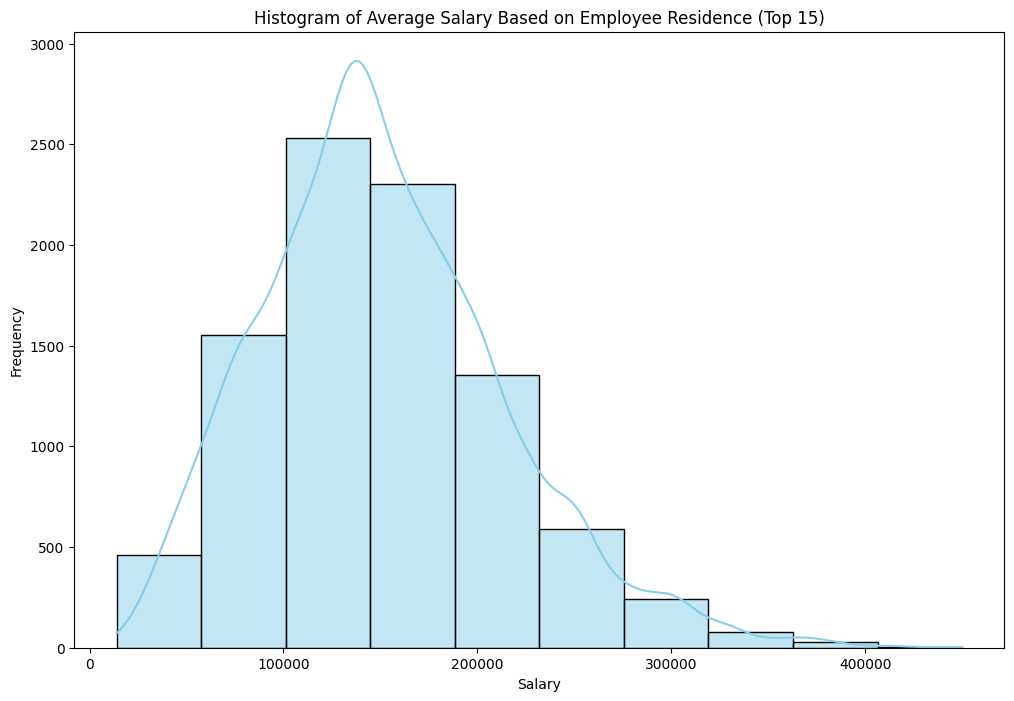

In [43]:
#10 Visualize Average Salary Based on Employee Residence and Company Location (Vertical Bar Plot)

def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Get the top 15 employee residence locations
top_15_residences = df['employee_residence'].value_counts().head(15).index

# Filter the DataFrame for the top 15 employee residence locations
df_top_15 = df[df['employee_residence'].isin(top_15_residences)]

# Create a histogram for the top 15 locations
plt.figure(figsize=(12, 8))
sns.histplot(df_top_15['salary'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Average Salary Based on Employee Residence (Top 15)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


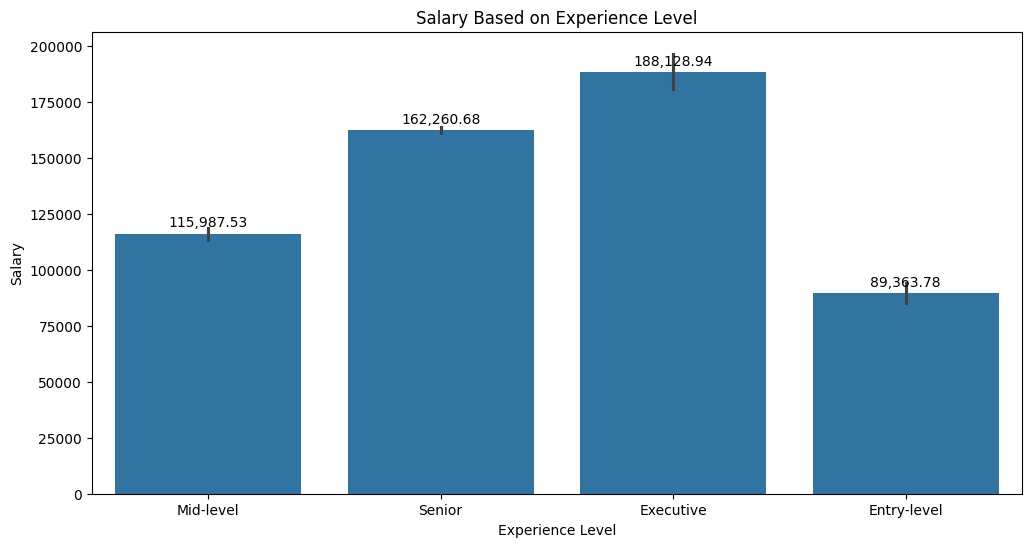

In [40]:
# 11. Visualize Salary Based on Experience Level

def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

# Visualize Salary Based on Experience Level (Barplot)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='experience_level', y='salary', data=df)
plt.title('Salary Based on Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
add_salary_values(ax)
plt.show()


<ipython-input-41-97403242f274>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='employment_type', y='salary', hue='work_setting', data=df, ci=None)


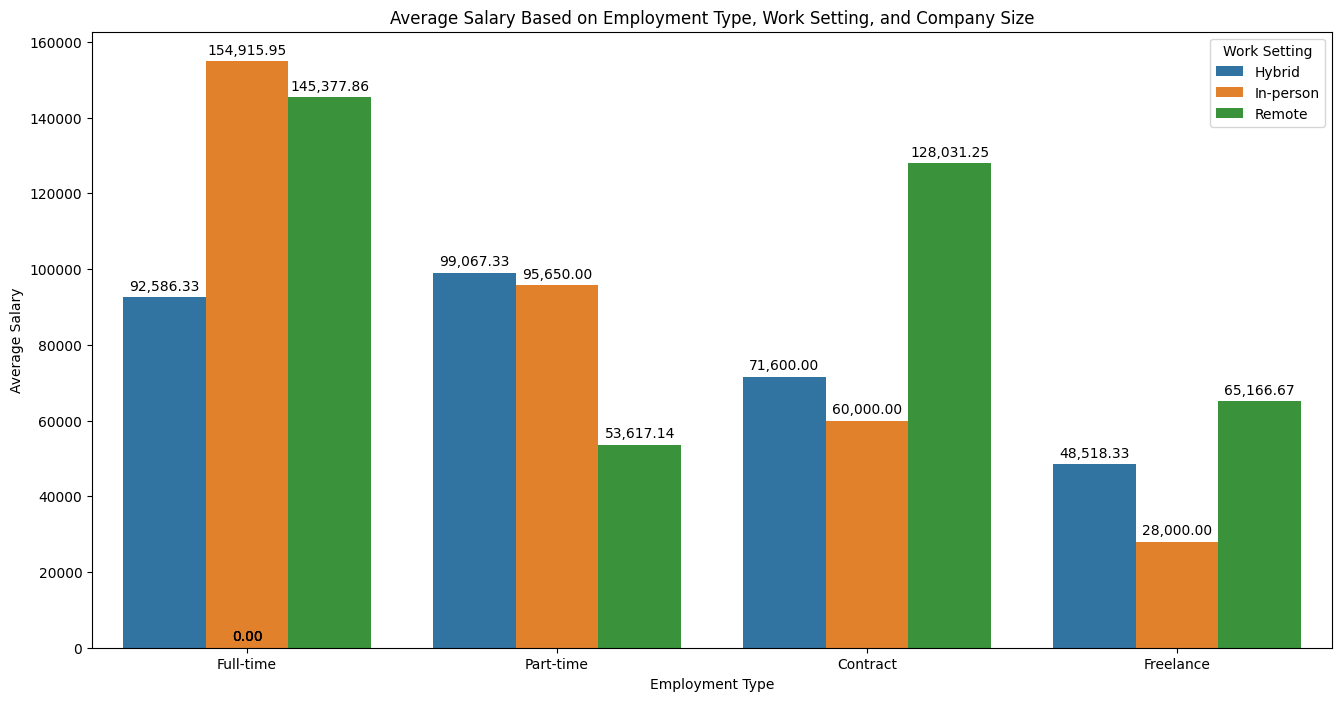

In [41]:
#12 Visualize Average Salary Based on Employment Type, Work Setting, and Company Size (Barplot)
def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='employment_type', y='salary', hue='work_setting', data=df, ci=None)
plt.title('Average Salary Based on Employment Type, Work Setting, and Company Size')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.legend(title='Work Setting')
add_salary_values(ax)
plt.show()
